In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import pathlib2 as pathlib
import numpy as np

# from sklearn.preprocessing import MultiLabelBinarizer

In [212]:
cwd=pathlib.Path.cwd()
datadirpath=cwd.joinpath("data")
rawdatapath=datadirpath.joinpath("raw")

# Explore collaborative_books_df.csv
-  remove index column, as pandas index suffices
- columns: ['title', 'book_id', 'user_id_mapping', 'book_id_mapping','Predicted Rating', 'Actual Rating']

- Number of observations: 196296
- Number of unique book ids: 898
- Number of unique user ids: 66909
- Average actual rating: 3.922902147776827
- Average predicted rating: 3.8966672779883433
## explore user_id_mapping
- (repeat) Number of users: 66909
- Max number of books revied per user: 22
- Min number of books revied per user: 1
- Number of users with 1 review: 12202
- ... in %: 18.0%
- Number of users with less than 6 reviews: 59981
- ... in %: 90.0%
## explore book_id
- (repeat) Number of books: 898
- Max number of users reviewd per book: 1296
- Min number of users reviewd per book: 36
- Number of books with 1 review: 0
- ... in %: 0.0%
- Number of books with less than 6 reviews: 0
- ... in %: 0.0%
## explore ratings
- Sum of reviews: 196296
- Average actual rating: 3.922902147776827
- Max actual rating: 5
- Min actual rating: 1


In [213]:
reviewdf=pd.read_csv(rawdatapath.joinpath("collaborative_books_df.csv"))
reviewdf=reviewdf.drop([reviewdf.columns[0]],axis=1) # removed unnamed index column
print(reviewdf.columns)

Index(['title', 'book_id', 'user_id_mapping', 'book_id_mapping',
       'Predicted Rating', 'Actual Rating'],
      dtype='object')


In [214]:
print(f"Number of observations: {len(reviewdf)}")
print(f"Number of unique book ids: {len(reviewdf["book_id"].unique())}")
print(f"Number of unique user ids: {len(reviewdf["user_id_mapping"].unique())}")
print(f"Average actual rating: {reviewdf["Actual Rating"].mean()}")
print(f"Average predicted rating: {reviewdf["Predicted Rating"].mean()}")

Number of observations: 196296
Number of unique book ids: 898
Number of unique user ids: 66909
Average actual rating: 3.922902147776827
Average predicted rating: 3.8966672779883433


<Axes: >

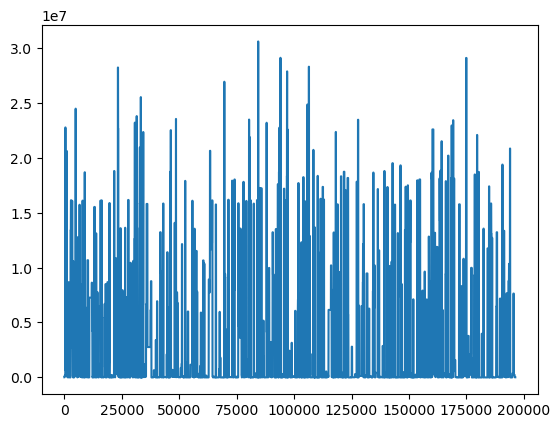

In [215]:
reviewdf["book_id"].plot() # not conclusive, try grouped by id, count as aggregate metric

In [216]:
num_books=len(reviewdf.book_id_mapping.unique())
print(f'Number of unique books: {num_books}') #898 --> that means we do not have data for all books

Number of unique books: 898


## Explore user ids

In [217]:
# groupby user id
reviewdf_userids=reviewdf[["user_id_mapping","book_id"]].groupby(by="user_id_mapping").count()
reviewdf_userids=reviewdf_userids.reset_index()
reviewdf_userids=reviewdf_userids.rename(columns={"book_id":"book_count"})

In [218]:
reviewdf_userids
print(f"(repeat) Number of users: {len(reviewdf_userids)}")
print(f"Max number of books revied per user: {reviewdf_userids.book_count.max()}")
print(f"Min number of books revied per user: {reviewdf_userids.book_count.min()}")
print(f"Number of users with 1 review: {len(reviewdf_userids.query('book_count == 3'))}")
print(f"... in %: {round(len(reviewdf_userids.query('book_count == 3'))/len(reviewdf_userids),2)*100}%") # 18% is suboptimal --> prediction of score for single user is probably not going to work
print(f"Number of users with less than 6 reviews: {len(reviewdf_userids.query('book_count < 6'))}")
print(f"... in %: {round(len(reviewdf_userids.query('book_count < 6'))/len(reviewdf_userids),2)*100}%") # 90% is suboptimal

(repeat) Number of users: 66909
Max number of books revied per user: 22
Min number of books revied per user: 1
Number of users with 1 review: 12202
... in %: 18.0%
Number of users with less than 6 reviews: 59981
... in %: 90.0%


In [219]:
# reviewdf_userids.plot(kind='bar')

## Explore book ids

In [220]:
# groupby book_id
reviewdf_bookids=reviewdf[["book_id","user_id_mapping"]].groupby(by="book_id").count()
reviewdf_bookids=reviewdf_bookids.reset_index()
reviewdf_bookids=reviewdf_bookids.rename(columns={"user_id_mapping":"user_count"})

In [221]:
print(f"(repeat) Number of books: {len(reviewdf_bookids)}")
print(f"Max number of users reviewd per book: {reviewdf_bookids.user_count.max()}")
print(f"Min number of users reviewd per book: {reviewdf_bookids.user_count.min()}")
print(f"Number of books with 1 review: {len(reviewdf_bookids.query('user_count == 3'))}")
print(f"... in %: {round(len(reviewdf_bookids.query('user_count == 3'))/len(reviewdf_bookids),2)*100}%") # 18% is suboptimal --> prediction of score for single user is probably not going to work
print(f"Number of books with less than 6 reviews: {len(reviewdf_bookids.query('user_count < 6'))}")
print(f"... in %: {round(len(reviewdf_bookids.query('user_count < 6'))/len(reviewdf_bookids),2)*100}%") # 90% is suboptimal

(repeat) Number of books: 898
Max number of users reviewd per book: 1296
Min number of users reviewd per book: 36
Number of books with 1 review: 0
... in %: 0.0%
Number of books with less than 6 reviews: 0
... in %: 0.0%


## Explore Ratings

In [222]:
reviewvaluecountsdf=reviewdf["Actual Rating"].value_counts()
reviewssum=reviewvaluecountsdf.sum()
reviewvaluecountsdf["percentage"]=reviewvaluecountsdf.transform(func=lambda x:x/reviewssum*100,axis=0) #50+% at rating of more than 3

predvaluecountsdf=reviewdf["Predicted Rating"].value_counts()
predvaluecountsdf["percentage"]=predvaluecountsdf.transform(func=lambda x:x/reviewssum*100,axis=0)

bins=[1,2,3,4,5,6] #
hist, edges = np.histogram(reviewdf["Predicted Rating"],bins=bins,density=False)
predbinsvaluecountsdf=pd.DataFrame(hist,index=bins[:-1],columns=["PredictedRating_count"])
predbinsvaluecountsdf["percentage"]=predbinsvaluecountsdf.transform(func=lambda x:x/reviewssum*100,axis=0)

<Axes: ylabel='count'>

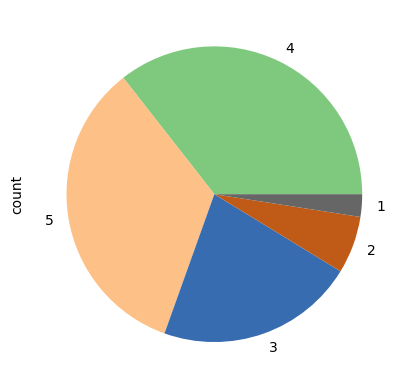

In [223]:
reviewvaluecountsdf["percentage"].plot(kind='pie',colormap='Accent')

In [224]:
# predvaluecountsdf

<Axes: ylabel='percentage'>

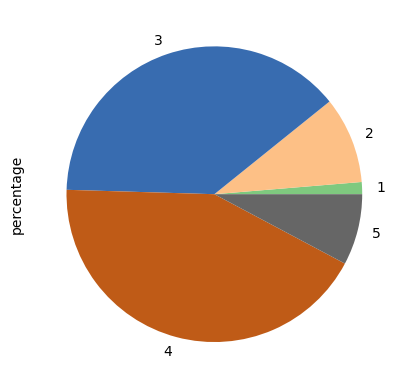

In [225]:
predbinsvaluecountsdf.percentage.plot(kind='pie',colormap='Accent')

In [226]:
print(f"Sum of reviews: {reviewssum}")

print(f"(repeat) Average actual rating: \n {reviewdf["Actual Rating"].mean()}")
print(f"Max actual rating: {reviewdf["Actual Rating"].max()}")
print(f"Min actual rating: {reviewdf["Actual Rating"].min()}")
print(f"Overview of Rating occurence: {reviewvaluecountsdf}")
print(f"... in percentage: \n {reviewvaluecountsdf["percentage"]}") # comparatively few bad reviews
print("________________ \n")
print(f"(repeat) Average predicted rating: {reviewdf["Predicted Rating"].mean()}")
print(f"Max predicted rating: {reviewdf["Predicted Rating"].max()}")
print(f"Min predicted rating: {reviewdf["Predicted Rating"].min()}")
# print(f"Overview of Rating occurence: {predvaluecountsdf}") # continuous values
# print(f"... in percentage: \n {predvaluecountsdf["percentage"]}") # continuous values, try binning
print(f"Overview of Rating occurence: \n {predbinsvaluecountsdf["PredictedRating_count"]}")
print(f"... in percentage: \n {predbinsvaluecountsdf["percentage"]}")

Sum of reviews: 196296
(repeat) Average actual rating: 
 3.922902147776827
Max actual rating: 5
Min actual rating: 1
Overview of Rating occurence: Actual Rating
4                                                         69813
5                                                         66663
3                                                         42680
2                                                         12303
1                                                          4837
percentage    Actual Rating
4    35.565167
5    33.960447
3 ...
Name: count, dtype: object
... in percentage: 
 Actual Rating
4    35.565167
5    33.960447
3    21.742674
2     6.267575
1     2.464136
Name: count, dtype: float64
________________ 

(repeat) Average predicted rating: 3.8966672779883433
Max predicted rating: 5.0
Min predicted rating: 1.0
Overview of Rating occurence: 
 1     2588
2    18588
3    76042
4    83816
5    15262
Name: PredictedRating_count, dtype: int64
... in percentage: 
 1     1.318417


# exploring collaborative_book_metadata.csv
- column: ['title', 'book_id', 'user_id_mapping', 'book_id_mapping', 'Predicted Rating', 'Actual Rating']
    - title: title of book, with series
    - image: link to cover picture
    - url: link to goodreads page of book
    - num_pages: number of pages
    - ratings_count: number of ratings (assumption: on goodreads)
    - description: blurb
    - genre: list of genres associated as single string
    - name: authors name (not allways correct, see: book_id 5899779 not supposed to be Jane Austen as Pride and Prejudice and Zombies is a Parody (?) of Pride and Prejudice)
    - book_id_mapping: redone book ids
- usable column for book content: num_pages, ratings_count, description (prep required), genre (prep required), name
## exploring columns
- Number of books: 96
___________________ 

- Max number of pages: 4100
- Avg number of pages: 388.96875
- Min number of pages: 26
___________________ 

- Max number of ratings: 1128913
- Avg number of ratings: 235801.38541666666
- Min number of ratings: 50020
___________________ 

- Number of unique authors: 83
- Authors with most books:
                    
|name|book_count|
|---|---|
|Charlaine Harris|3|
|Fiona Staples|3|
|Christopher Paolini|3|
|George R.R. Martin|2|
|Robert Jordan|2|

In [227]:
booksdf=pd.read_csv(rawdatapath.joinpath('collaborative_book_metadata.csv'))
booksdf=booksdf.drop([booksdf.columns[0]],axis=1) # removed unnamed index column
print(booksdf.columns)
booksgroupbyauthorsdf=booksdf[["name","book_id_mapping"]].groupby(by="name").count()
booksgroupbyauthorsdf=booksgroupbyauthorsdf.reset_index()
booksgroupbyauthorsdf=booksgroupbyauthorsdf.rename(columns={"book_id_mapping":"book_count"})

Index(['book_id', 'title', 'image_url', 'url', 'num_pages', 'ratings_count',
       'description', 'genre', 'name', 'book_id_mapping'],
      dtype='object')


In [228]:
booksgroupbyauthorsdf.sort_values(by="book_count",ascending=False).head()

,name,book_count
7,Charlaine Harris,3
21,Fiona Staples,3
11,Christopher Paolini,3
22,George R.R. Martin,2
67,Robert Jordan,2


In [229]:
print(f"Number of books: {len(booksdf)}")
print("___________________ \n")
print(f"Max number of pages: {booksdf.num_pages.max()}")
print(f"Avg number of pages: {booksdf.num_pages.mean()}")
print(f"Min number of pages: {booksdf.num_pages.min()}")
print("___________________ \n")
print(f"Max number of ratings: {booksdf.ratings_count.max()}")
print(f"Avg number of ratings: {booksdf.ratings_count.mean()}")
print(f"Min number of ratings: {booksdf.ratings_count.min()}")
print("___________________ \n")
print(f"Number of unique authors: {len(booksdf.name.unique())}")
print(f"Authors with most books: {booksgroupbyauthorsdf.sort_values(by="book_count",ascending=False).head()}") #max =3, not al lot of books per author, maybe not predictive enough

Number of books: 96
___________________ 

Max number of pages: 4100
Avg number of pages: 388.96875
Min number of pages: 26
___________________ 

Max number of ratings: 1128913
Avg number of ratings: 235801.38541666666
Min number of ratings: 50020
___________________ 

Number of unique authors: 83
Authors with most books:                    name  book_count
7      Charlaine Harris           3
21        Fiona Staples           3
11  Christopher Paolini           3
22   George R.R. Martin           2
67        Robert Jordan           2


## explore genres

In [230]:
# split and process genres
booksdf['genre']=booksdf.genre.apply(lambda x: x.replace("'","")) # remove '
booksdf['genre']=booksdf.genre.apply(lambda x: x.replace("-","")) # revome - 
booksdf['genre']=booksdf.genre.apply(lambda x: x.replace(" ","")) # remove spaces
booksdf['genre']=booksdf.genre.apply(lambda x: x[1:-1].split(',')) # split into list

In [231]:
# get number of genres
booksdf["num_genres"]=booksdf.genre.apply(lambda x: len(x))

In [232]:
print(f"Max number of genres: {booksdf.num_genres.max()}")
print(f"Avg number of genres: {booksdf.num_genres.mean()}")
print(f"Min number of genres: {booksdf.num_genres.min()}")

Max number of genres: 12
Avg number of genres: 5.760416666666667
Min number of genres: 1


In [233]:
flattenedgenres=[g for sub in booksdf.genre.to_list() for g in sub]
uniquegenres=list(set(flattenedgenres))

In [234]:
print(uniquegenres)
print(f"Number of unique genres: {len(uniquegenres)}") # 16 genres: maybe too many --> sparse

['crime', 'romance', 'historicalfiction', 'children', 'mystery', 'graphic', 'poetry', 'paranormal', 'history', 'fiction', 'nonfiction', 'youngadult', 'comics', 'thriller', 'fantasy', 'biography']
Number of unique genres: 16


In [235]:
# encode genres
booksdf=booksdf.join(booksdf.genre.str.join('|').str.get_dummies())

In [236]:
genressum=booksdf[uniquegenres].sum()

In [237]:
genressum

crime                28
romance              53
historicalfiction    23
children             20
mystery              28
graphic              14
poetry                5
paranormal           60
history              23
fiction              92
nonfiction           16
youngadult           66
comics               14
thriller             28
fantasy              60
biography            23
dtype: int64

In [238]:
print(f"Max amount of books in genre: {genressum.max()}") # fiction, with 96 books total and 16 nonfiction? are there fiction/nonfiction books?
print(f"Avg amount of books in genre: {genressum.mean()}")
print(f"Min amount of books in genre: {genressum.min()}") # poetry only has 5 books, could be underrepresented

Max amount of books in genre: 92
Avg amount of books in genre: 34.5625
Min amount of books in genre: 5


In [239]:
contradictorygenresdf=booksdf[(booksdf['nonfiction']==1) & (booksdf['fiction']==1)]

In [240]:
booksdf

,book_id,title,image_url,url,num_pages,ratings_count,description,genre,name,book_id_mapping,...,graphic,historicalfiction,history,mystery,nonfiction,paranormal,poetry,romance,thriller,youngadult
0,5899779,Pride and Prejudice and Zombies Pride and Prej...,https://images.gr-assets.com/books/1320449653m...,https://www.goodreads.com/book/show/5899779-pr...,320,105537,The New York Times Best Seller is now a major ...,"[fantasy, paranormal, romance, fiction, histor...",Jane Austen,808,...,0,1,1,1,0,1,0,1,1,1
1,872333,Blue Bloods Blue Bloods 1,https://images.gr-assets.com/books/1322281515m...,https://www.goodreads.com/book/show/872333.Blu...,302,117633,"When the Mayflower set sail in 1620, it carrie...","[youngadult, fantasy, paranormal, romance, fic...",Melissa de la Cruz,217,...,0,0,0,1,0,1,0,1,1,1
2,15507958,Me Before You Me Before You 1,https://images.gr-assets.com/books/1357108762m...,https://www.goodreads.com/book/show/15507958-m...,369,609327,Louisa Clark is an ordinary young woman living...,"[romance, fiction]",Jojo Moyes,385,...,0,0,0,0,0,0,0,1,0,0
3,66559,Sharp Objects,https://images.gr-assets.com/books/1423241485m...,https://www.goodreads.com/book/show/66559.Shar...,254,208394,"Fresh from a brief stay at a psych hospital, r...","[mystery, thriller, crime, fiction]",Gillian Flynn,192,...,0,0,0,1,0,0,0,0,1,0
4,7235533,The Way of Kings The Stormlight Archive 1,https://images.gr-assets.com/books/1507307887m...,https://www.goodreads.com/book/show/7235533-th...,1007,151473,"Speak again the ancient oaths,\nLife before de...","[fantasy, paranormal, fiction]",Brandon Sanderson,873,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,10600242,How to Be a Woman,https://images.gr-assets.com/books/1405909800m...,https://www.goodreads.com/book/show/10600242-h...,312,72029,Though they have the vote and the Pill and hav...,"[nonfiction, history, historicalfiction, biogr...",Caitlin Moran,356,...,1,1,1,0,1,0,0,0,0,0
92,9516,Persepolis The Story of a Childhood Persepolis 1,https://images.gr-assets.com/books/1425871473m...,https://www.goodreads.com/book/show/9516.Perse...,153,119470,"A New York TimesNotable Book\nA Time Magazine""...","[comics, graphic, nonfiction, history, histori...",Mattias Ripa,708,...,1,1,1,0,1,0,0,0,0,1
93,307791,The City of Ember Book of Ember 1,https://images.gr-assets.com/books/1397931596m...,https://www.goodreads.com/book/show/307791.The...,270,202775,"Many hundreds of years ago, the city of Ember ...","[youngadult, fantasy, paranormal, fiction, chi...",Jeanne DuPrau,175,...,0,0,0,1,0,1,0,0,1,1
94,37442,Wicked The Life and Times of the Wicked Witch ...,https://images.gr-assets.com/books/1437733293m...,https://www.goodreads.com/book/show/37442.Wicked,409,508863,When Dorothy triumphed over the Wicked Witch o...,"[fantasy, paranormal, fiction, youngadult, rom...",Douglas Smith,374,...,0,0,0,0,0,1,0,1,0,1


In [241]:
print(f"Number of books both fiction and nonfiction: {len(contradictorygenresdf)}") # 12, consider removing fiction-genre?

Number of books both fiction and nonfiction: 12


In [242]:
# contradictorygenresdf

## Join books_df (reviews) with book_metadata (books)

In [243]:
joinedouterdf=pd.merge(reviewdf,booksdf,left_on='book_id_mapping',right_on='book_id_mapping',how='outer')
joinedinnerdf=pd.merge(reviewdf,booksdf,left_on='book_id_mapping',right_on='book_id_mapping',how='inner')

In [244]:
tempdupesdf=pd.concat([joinedouterdf[['book_id_mapping','user_id_mapping']],joinedinnerdf[['book_id_mapping','user_id_mapping']]],).drop_duplicates(keep=False) # get non-matches, len 176 473 is correct length
differencedf=joinedouterdf.drop(index=tempdupesdf.index)

In [245]:
print(len(joinedouterdf))
print(len(joinedinnerdf))
len(joinedouterdf)-len(joinedinnerdf) # check number of non matches

196297
19824


176473

In [246]:
print(len(differencedf))
print(len(tempdupesdf))
len(tempdupesdf)+len(differencedf) # checked with above so lengths match

19824
176473


196297

In [247]:
tempcheckdf=joinedinnerdf.duplicated(tempdupesdf,False)
tempcheckdf.value_counts() # only False --> no dupes, code worked correctly

False    19824
Name: count, dtype: int64

## save new dataframes to csv files

In [248]:
processeddatapath=datadirpath.joinpath('processed')
try: 
    processeddatapath.mkdir(exist_ok=False)
except FileExistsError:
    print('Directory already exists')

Directory already exists


In [249]:
outerjoinpath=processeddatapath.joinpath('outerJoinData.csv')
innerjoinpath=processeddatapath.joinpath('innerJoinData.csv')
differencejoinpath=processeddatapath.joinpath('differenceJoinData.csv')
dupesjoinpath=processeddatapath.joinpath('duplicatesJoinData.csv')
booksdfpath=rawdatapath.joinpath('collaborative_book_metadata_with_genredummies.csv')

In [251]:
joinedouterdf.to_csv(outerjoinpath,sep=';',index=False)
joinedinnerdf.to_csv(innerjoinpath,sep=';',index=False)
differencedf.to_csv(differencejoinpath,sep=';',index=False)
tempdupesdf.to_csv(dupesjoinpath,sep=';',index=False)
booksdf.to_csv(booksdfpath,sep=';',index=False)